# Import packages

In [73]:
import os
import sys
%matplotlib inline
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import datetime

#to set unique date for outputs
calc_date = datetime.datetime.now()
date=calc_date.strftime('%Y-%m-%d')
#date=calc_date.strftime('%d-%m-%Y')
date = date.replace('-', '')

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=300, dpi_save=300)

# input data and metadata

In [74]:
data_path = '/lustre/scratch117/cellgen/team298/SharedFolders/ar32/YS/main_data_with_WE_added/temp_combined_YS_EL_no_obsm_raw_20220520.h5ad'

metadata_input = '' # leave blank if don't want to use

adata = sc.read(data_path)

if len(metadata_input) == 0:
    pass
else:
    metadata = pd.read_csv(metadata_input, index_col=0)
    adata = adata[adata.obs.index.isin(list(metadata.index))]
    adata.obs = metadata

In [75]:
adata.obs['tissue'].value_counts()

YS       169494
Liver     49376
Name: tissue, dtype: int64

In [76]:
adata_YS = adata[adata.obs['tissue'].isin(['YS'])]
adata_fliv = adata[adata.obs['tissue'].isin(['Liver'])]

In [77]:
sc.pp.normalize_total(adata_fliv, target_sum=1e4)
sc.pp.log1p(adata_fliv)

/home/jovyan/my-conda-envs/YS_env/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)


In [78]:
adata_list = [adata_YS, adata_fliv]
adata = sc.AnnData.concatenate(*adata_list, join='inner', batch_categories=None ,index_unique=None)

/home/jovyan/my-conda-envs/YS_env/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [79]:
adata.obs['celltypes_for_dotplot'] = adata.obs['cell.labels'].astype(str) + '_' + adata.obs['tissue'].astype(str)
adata = adata[adata.obs['celltypes_for_dotplot'].isin(['Immature_EC_YS','Sinusoidal_EC_YS','Prolif_Sinusoidal_EC_YS','VWF_EC_YS','AEC_YS','Prolif_AEC_YS','HE_YS','Endothelium_Liver'])]
adata.obs['celltypes_for_dotplot'] = adata.obs['celltypes_for_dotplot'].astype('category')
adata.obs['celltypes_for_dotplot'] = adata.obs['celltypes_for_dotplot'].cat.reorder_categories(['Immature_EC_YS','Sinusoidal_EC_YS','Prolif_Sinusoidal_EC_YS','VWF_EC_YS','AEC_YS','Prolif_AEC_YS','HE_YS','Endothelium_Liver'])

/tmp/ipykernel_6086/82104297.py:3: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['celltypes_for_dotplot'] = adata.obs['celltypes_for_dotplot'].astype('category')


In [80]:
# sc.pp.normalize_total(adata, target_sum=1e4)
# sc.pp.log1p(adata)
#sc.pp.scale(adata, max_value = 10)

In [81]:
adata.obs['celltypes_for_dotplot'] =adata.obs['celltypes_for_dotplot'].astype('category')
adata.obs['celltypes_for_dotplot'] = adata.obs['celltypes_for_dotplot'].cat.reorder_categories([ 'Sinusoidal_EC_YS', 'Prolif_Sinusoidal_EC_YS','Immature_EC_YS',
       'VWF_EC_YS', 'AEC_YS', 'Prolif_AEC_YS', 'HE_YS', 'Endothelium_Liver'])

In [82]:
dic = {
'SI_EC':['LYVE1','STAB2','KDR'],
'VWF':['CD34','VWF'],
'AEC':['PLVAP','IL33','GJA4'],
'HE':['GJA5','ALDH1A1'],
'Prolif':['CDK1','MKI67']    
}

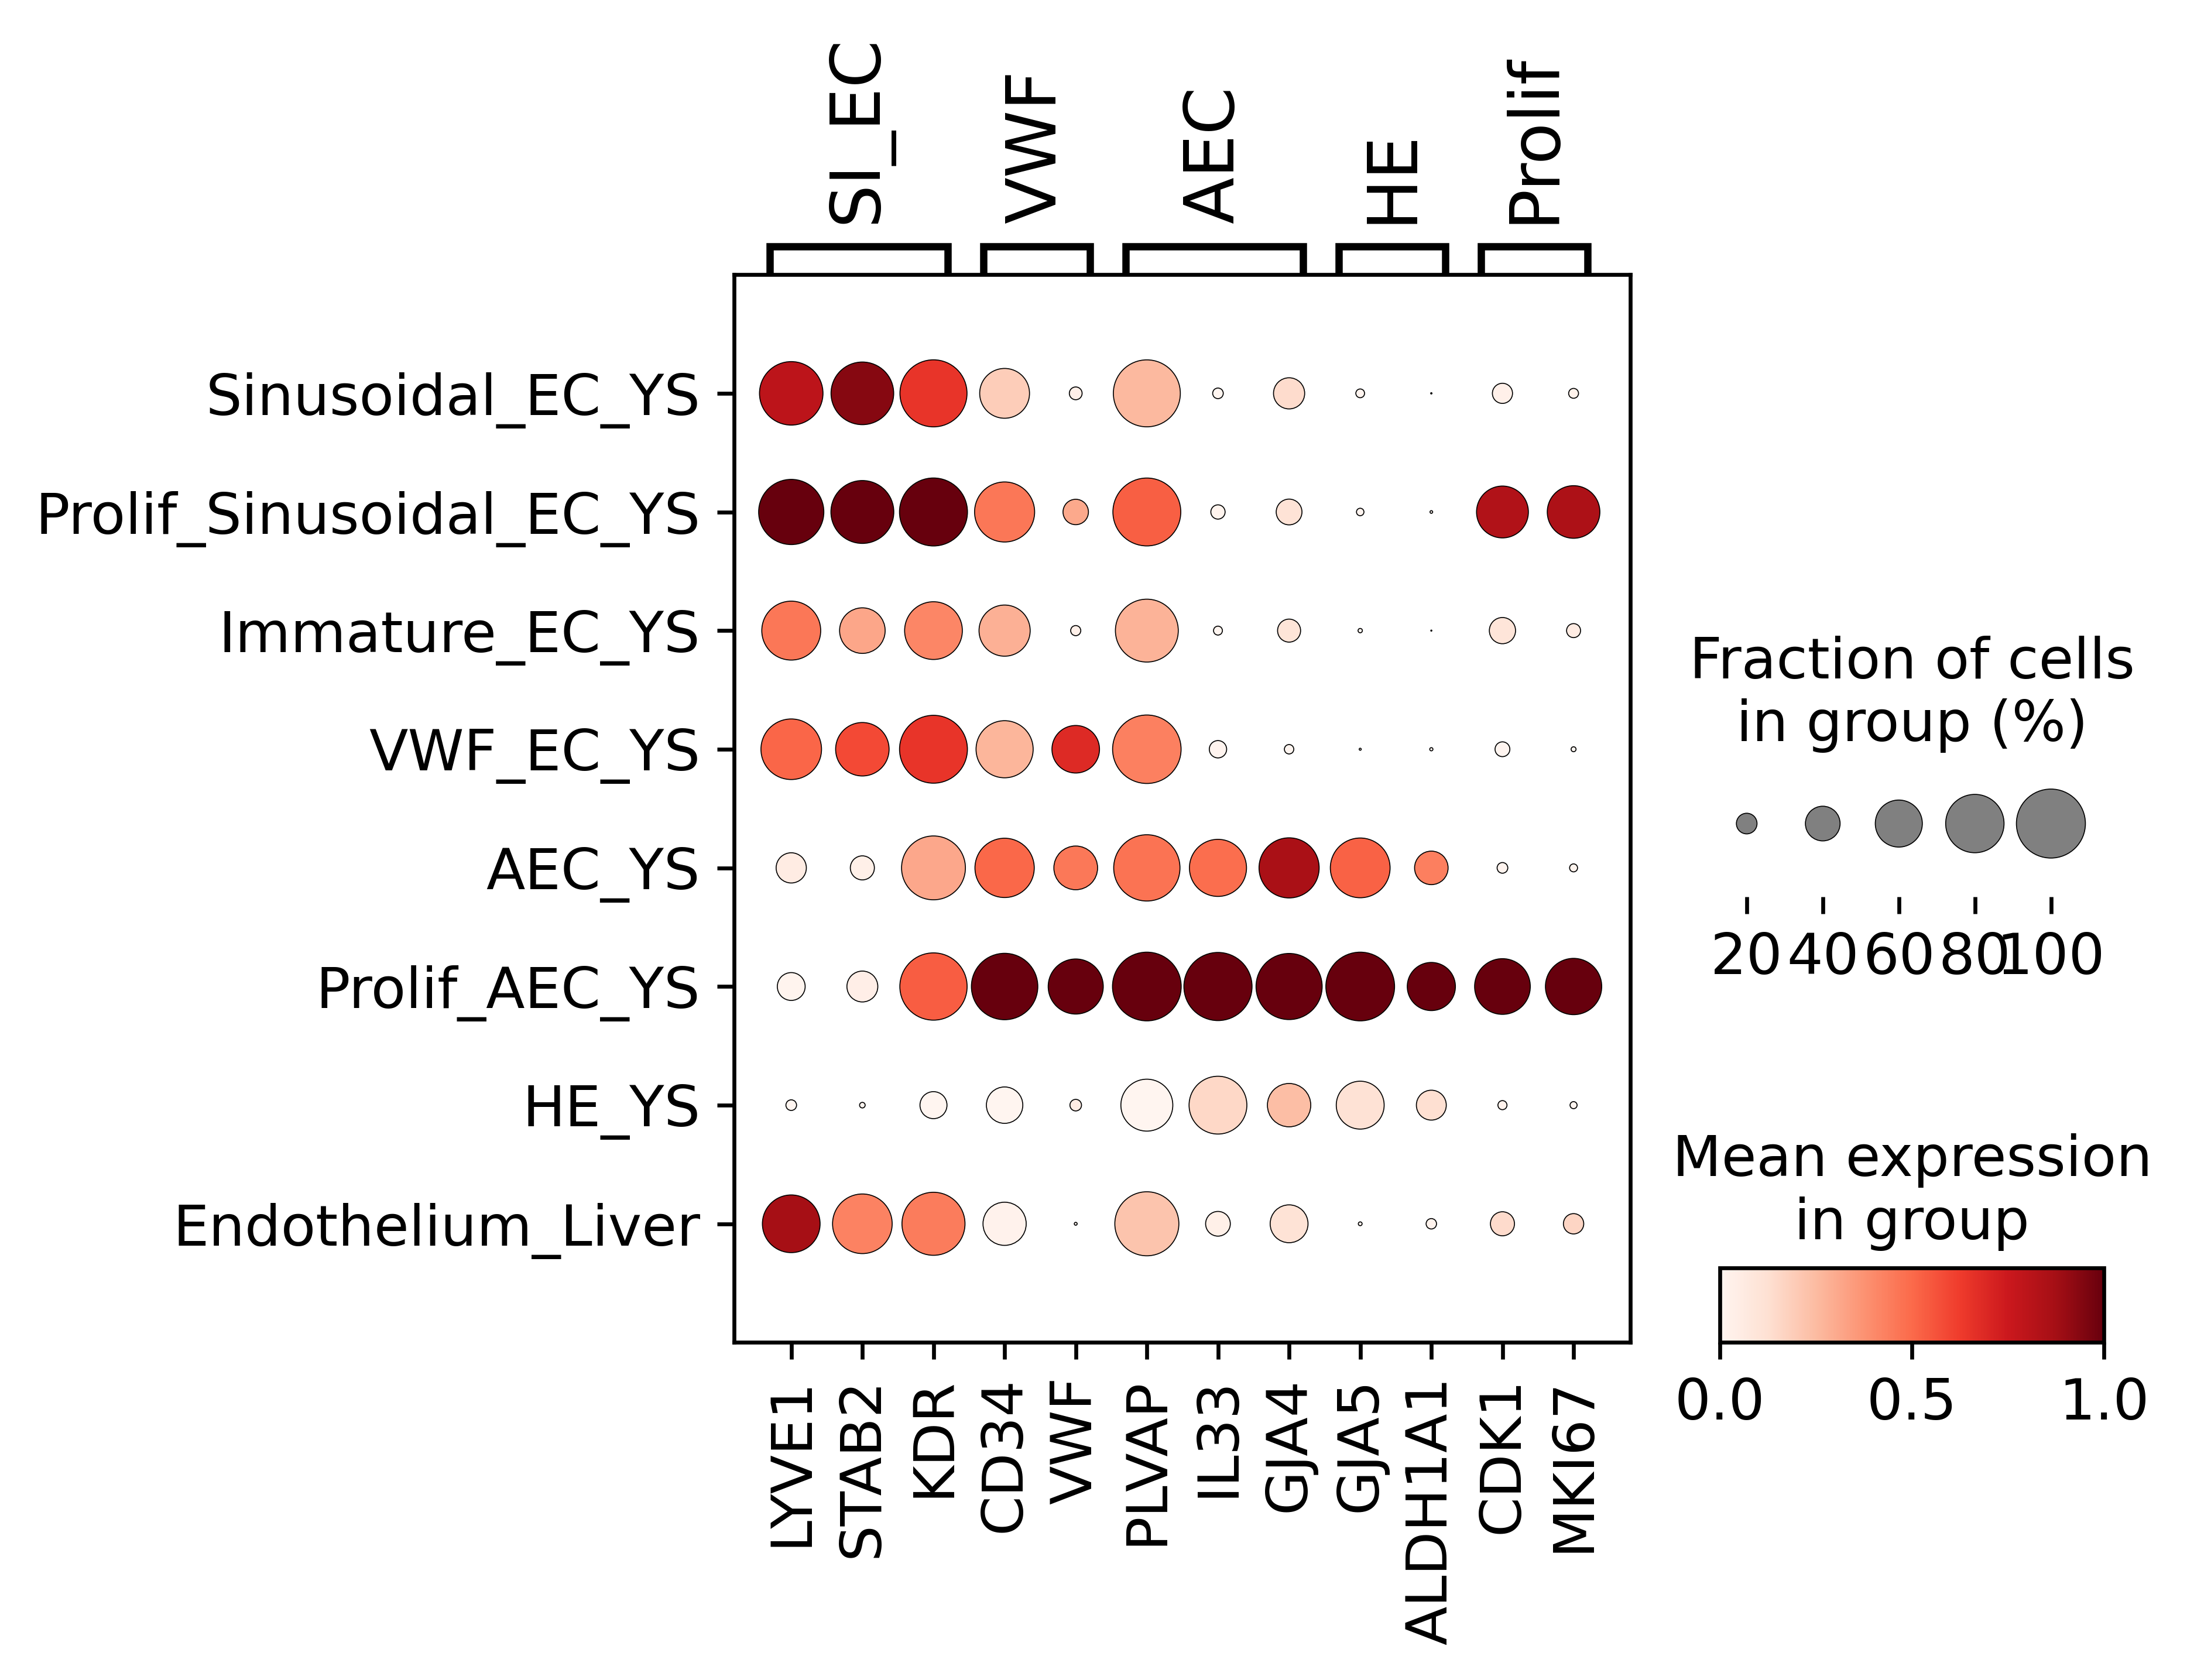

In [84]:
sc.pl.dotplot(adata, var_names=dic, groupby='celltypes_for_dotplot', num_categories = 7, use_raw=False, swap_axes=False, figsize=(5,4), cmap = 'Reds', standard_scale='var', save='ECd_part1_20220608')

In [92]:
clara = sc.read('/lustre/scratch117/cellgen/team298/SharedFolders/YS_proj/Datasets/V6_IPSC_DC_qc_total_raw_data_150522.h5ad')

In [93]:
sc.pp.normalize_total(clara, target_sum=1e4)
sc.pp.log1p(clara)

normalizing counts per cell
    finished (0:00:00)


In [94]:
clara.obs['LR_assignment_v2'].value_counts()

Mesothelium_IPSC                     33598
Smooth_Muscle_IPSC                    6834
HSPC_2_IPSC                           6562
Fibroblast_IPSC                       6330
Macrophage_IPSC                       2550
MOP_IPSC                              1850
Endoderm_IPSC                         1623
Immature_EC_IPSC                      1527
HSPC_1_IPSC                           1446
Prolif_Sinusoidal_EC_IPSC             1366
AdvancedMesoderm_IPSC                 1349
Monocyte_IPSC                         1268
Promonocyte_IPSC                      1189
Erythroid_IPSC                        1038
CMP_IPSC                               592
MK_IPSC                                525
Neutrophil_myeloid_precursor_IPSC      490
Monocyte_Macrophage_IPSC               457
Mast_cell_IPSC                         408
AEC_IPSC                               199
Early_Erythroid_IPSC                   191
Sinusoidal_EC_IPSC                      51
HE_IPSC                                 49
Pre_Macroph

In [95]:
clara.obs.replace({'LR_assignment_v2':'Prolif_Sinusoidal_EC_IPSC'},'Prolif_EC_IPSC',inplace=True)

celltypes = [
'Sinusoidal_EC_IPSC',
'Prolif_EC_IPSC',
'Immature_EC_IPSC',
'AEC_IPSC',
'HE_IPSC']

clara = clara[clara.obs['LR_assignment_v2'].isin(celltypes)]

clara.obs['celltypes_for_dotplot'] =clara.obs['LR_assignment_v2'].astype('category')
clara.obs['celltypes_for_dotplot'] = clara.obs['celltypes_for_dotplot'].cat.reorder_categories(celltypes)

/tmp/ipykernel_6086/363935913.py:12: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  clara.obs['celltypes_for_dotplot'] =clara.obs['LR_assignment_v2'].astype('category')


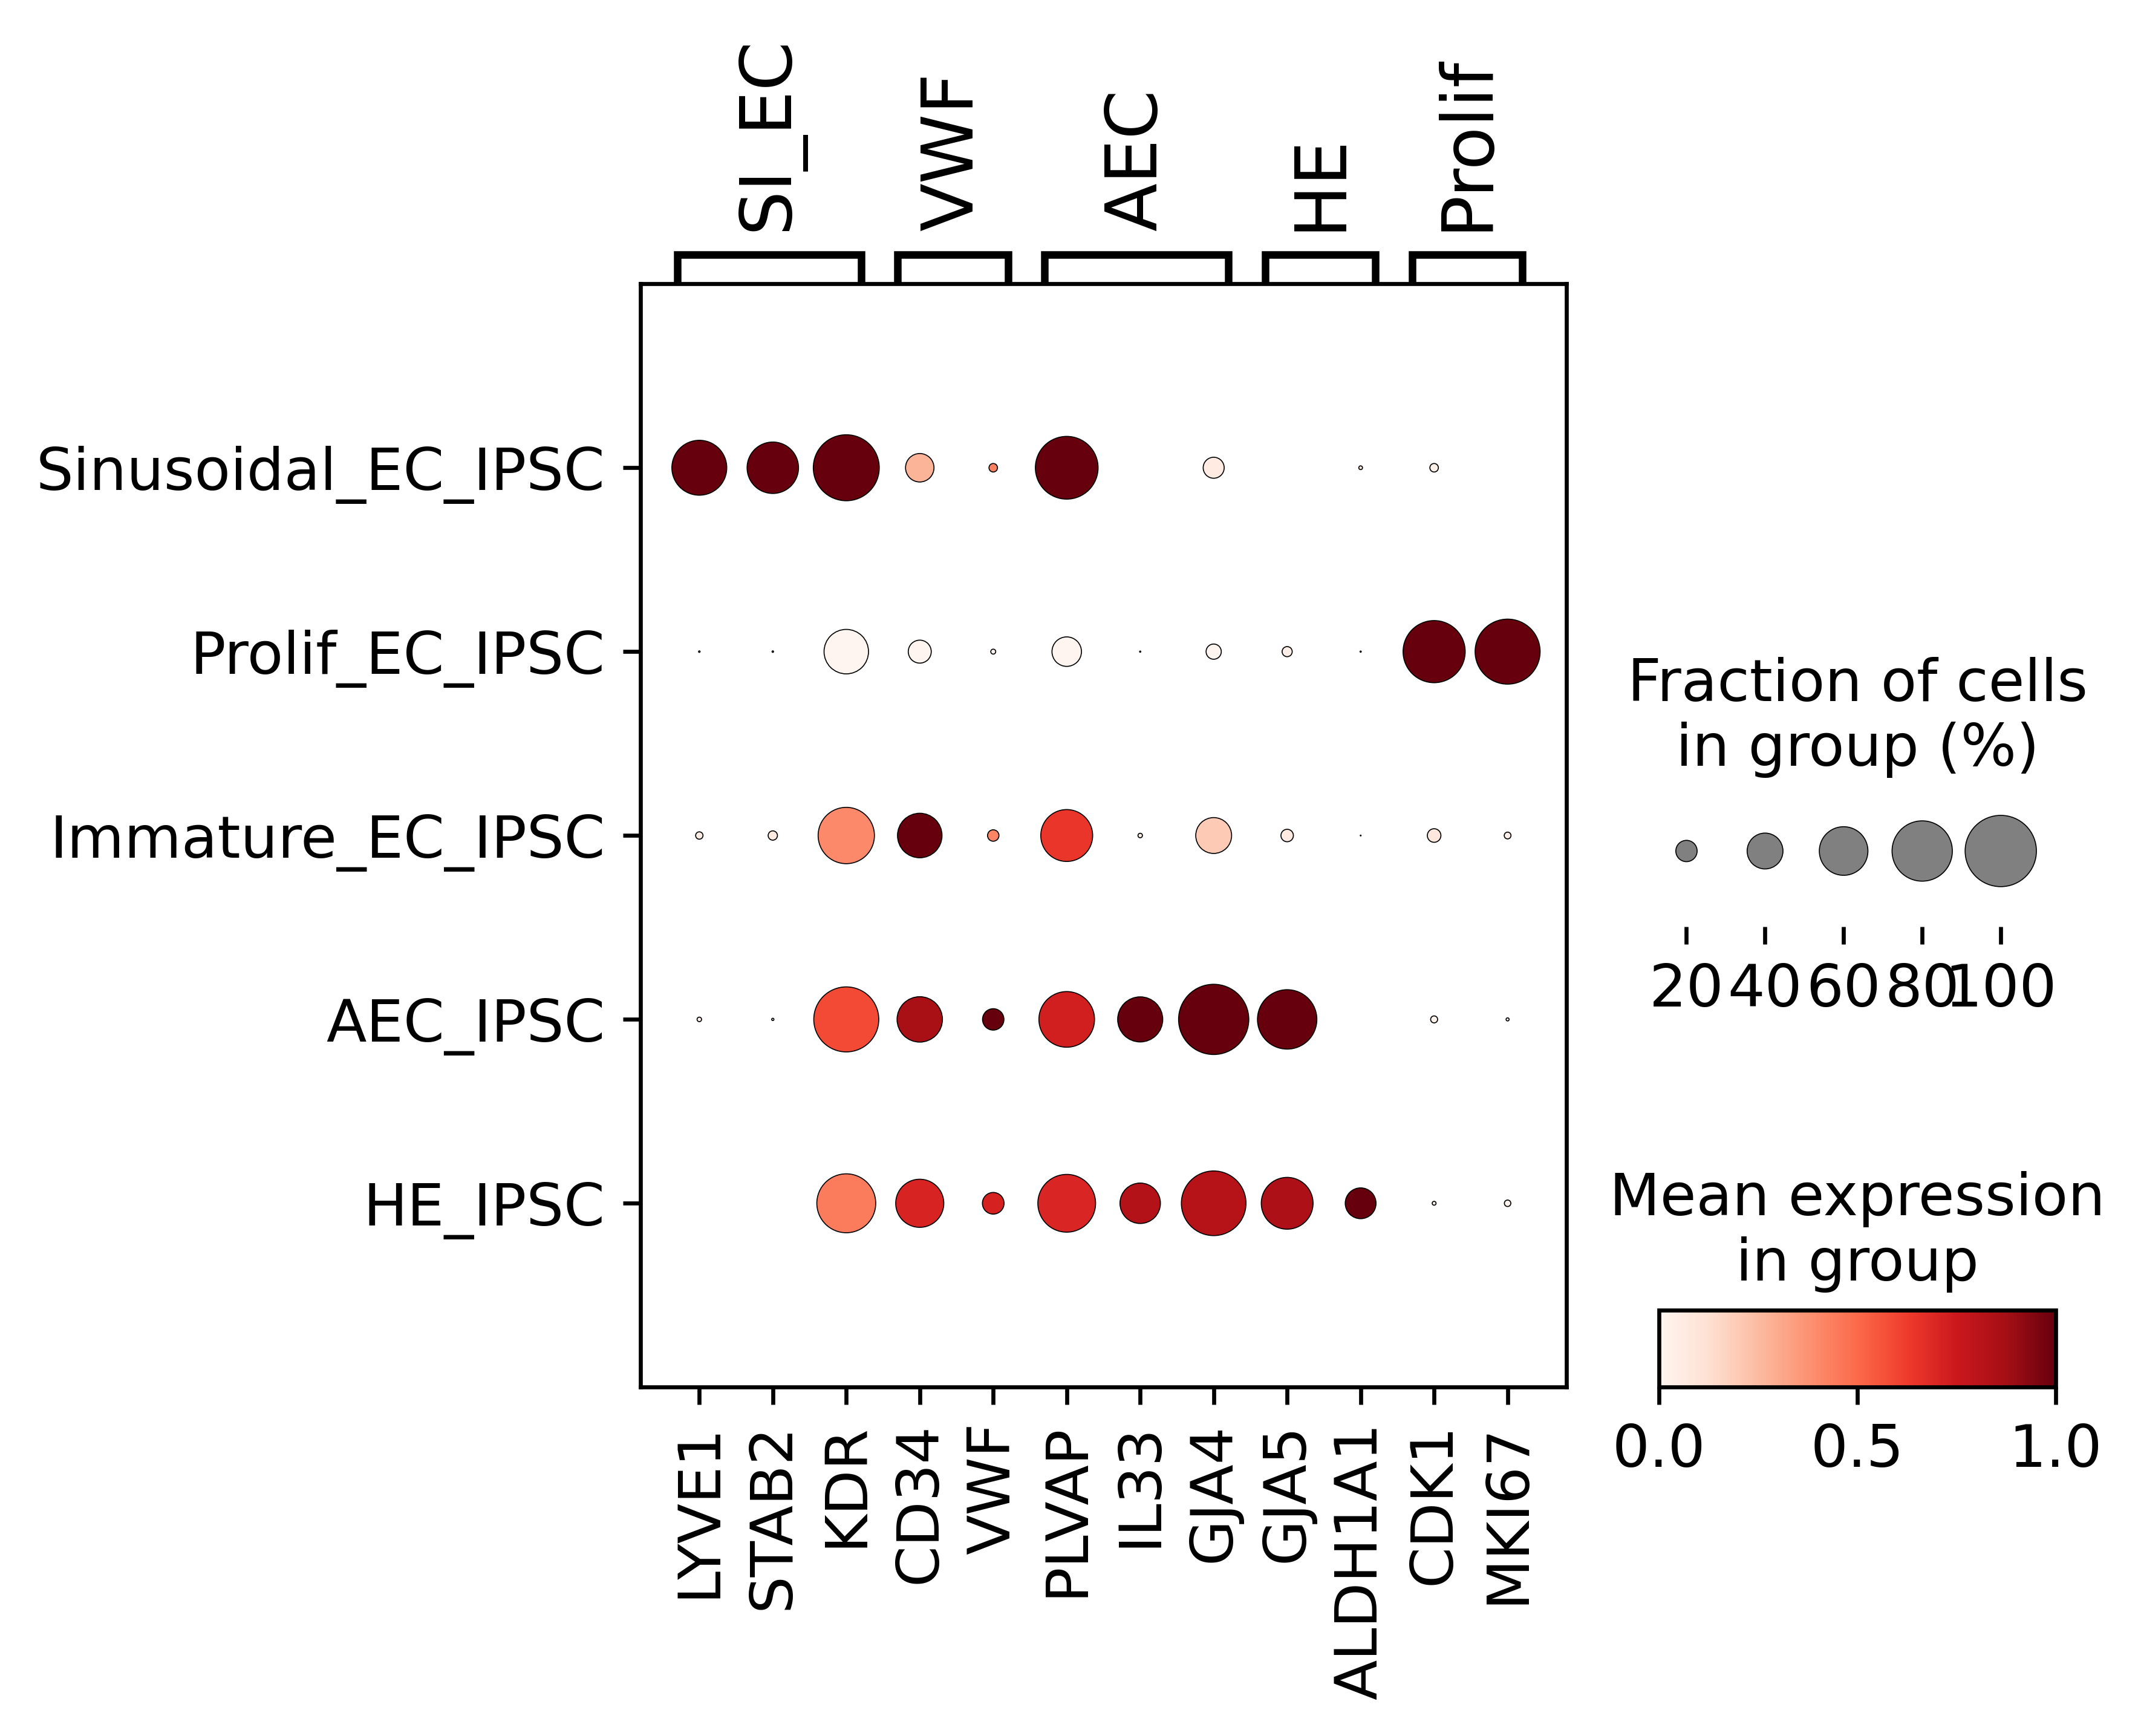

In [96]:
sc.pl.dotplot(clara, var_names=dic, groupby='celltypes_for_dotplot', num_categories = 7, use_raw=False, swap_axes=False, figsize=(5,4), cmap = 'Reds', standard_scale='var', save='ECd_part2_20220608')